<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
df['ConvertedComp']
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [4]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


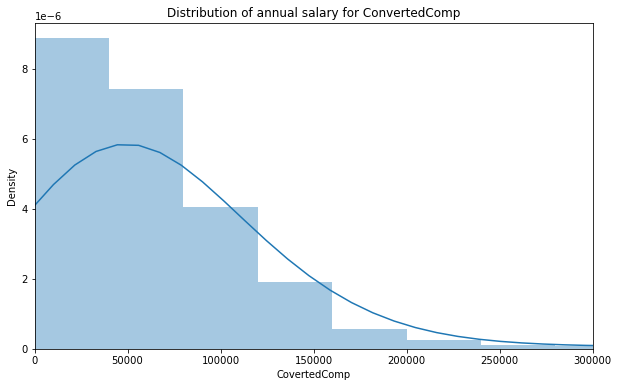

In [49]:
plt.figure(figsize=(10,6))

ax = sns.distplot(df['ConvertedComp'],hist=True)

plt.title('Distribution of annual salary for ConvertedComp')
plt.xlabel('CovertedComp')
plt.ylabel('Density')
plt.xlim(0,300000)

plt.show()

Plot the histogram for the column `ConvertedComp`.


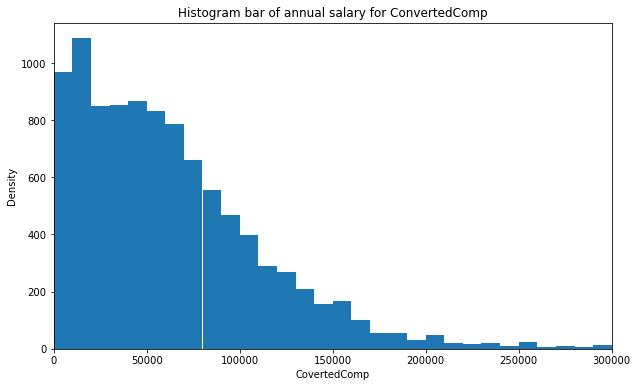

In [5]:
# your code goes here
plt.figure(figsize=(10,6))

plt.hist(df['ConvertedComp'],bins=int(30), range=[0,300000])

plt.title('Histogram bar of annual salary for ConvertedComp')
plt.xlabel('CovertedComp')
plt.ylabel('Density')
plt.xlim(0,300000)

plt.show()

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
median = df['ConvertedComp'].median()
print('The median for the column ConvertedComp is', median)

The median for the column ConvertedComp is 57745.0


How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here
responders_man = df['Gender'][df['Gender'] == 'Man']
num_of_man = len(responders_man)
print(num_of_man,'of responders were identified as man')

10480 of responders were identified as man


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
df[['ConvertedComp','Gender']].groupby('Gender').median()

,ConvertedComp
Gender,
Man,57744.0
"Man;Non-binary, genderqueer, or gender non-conforming",59520.0
"Non-binary, genderqueer, or gender non-conforming",67142.0
Woman,57708.0
Woman;Man,21648.0
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",30244.0
"Woman;Non-binary, genderqueer, or gender non-conforming",65535.5


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# your code goes here
df['Age'].sort_values(ascending=False)

9198     99.0
3376     72.0
2322     71.0
4614     71.0
6545     69.0
         ... 
10963     NaN
11067     NaN
11167     NaN
11282     NaN
11283     NaN
Name: Age, Length: 11398, dtype: float64

Plot a histogram of the column `Age`.


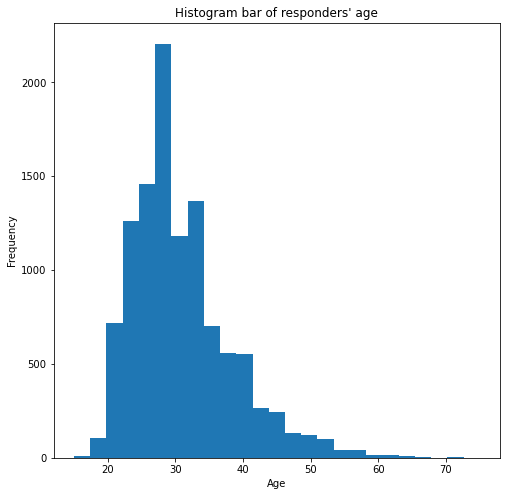

In [10]:
# your code goes here
plt.figure(figsize=(8,8))

plt.hist(df['Age'],bins=int(25), range=[15,75])

plt.title('Histogram bar of responders\' age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


Yes, there are outliers


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


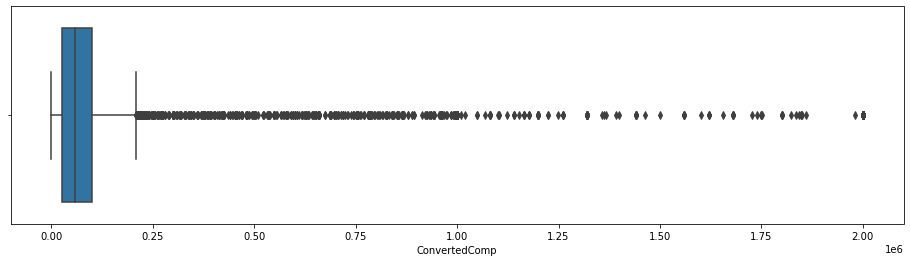

In [11]:
# your code goes here
plt.figure(figsize=(16,4))
sns.boxplot(df['ConvertedComp'])
print('Yes, there are outliers')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
# your code goes here
# df['ConvertedComp']
# np.percentile(df['ConvertedComp'],[20000,80000])
q1, q2, q3 = df['ConvertedComp'].quantile([0.25, 0.5, 0.75])
print('q1_25% = {}\t\t q2_50% = {}\t\t q3_75% = {}'. format(q1,q2,q3))
iqr = q3 - q1
print('Inter quartile range is:', iqr)

q1_25% = 26868.0		 q2_50% = 57745.0		 q3_75% = 100000.0
Inter quartile range is: 73132.0


Find out the upper and lower bounds.


In [13]:
# your code goes here
print('The interquartile lower bound is: {} while the upper bound is {}'. format(q1,q3))

The interquartile lower bound is: 26868.0 while the upper bound is 100000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
# your code goes here
# len(df['ConvertedComp'][df['ConvertedComp']>q3].sort_values())

outlier_df = df['ConvertedComp'][df['ConvertedComp']>(q3+1.5*iqr)]
print('The dataset has',len(outlier_df),'outliers in the ConvertedComp column')

The dataset has 879 outliers in the ConvertedComp column


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [15]:
# your code goes here
outlier_remove = df['ConvertedComp'][df['ConvertedComp']<(q3+1.5*iqr)]
outlier_remove.max()

209356.0

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [16]:
# your code goes here
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

In [30]:
# your code goes here
outlier_remove = df['ConvertedComp'][df['ConvertedComp']<(q3+1.5*iqr)]
outlier_remove.mean()

59883.20838915799

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
